## **Ensemble Learning**

* Ensemble learning is a machine learning technique that aggregates two or more learners/models in order to produce better predictions.

* Ensemble learning rests on the principle that a collectivity of learners yields greater overall accuracy than an individual learner.

* Terminologies
    * Base learner: It refers to the individual model or models used in ensemble algorithms. 

    * Weak models or learners: They are defined as those that perform little better than random guessing. 
    
    * Strong models or learners: They are those models that achieve excellent predictive performance

    * Parallel model ensembling: 
        * Parallel methods train each base learner apart from the others of the others. Per its name, then, parallel ensembles train base learners in parallel and independent of one another.
        * Parallel methods are further divided into homogenous and heterogenous methods. Homogenous parallel ensembles use the same base learning algorithm to produce all of the component base learners. Heterogenous parallel ensembles use different algorithms to produce base learners

    * Sequential model ensembling: Sequential methods train a new base learner so that it minimizes errors made by the previous model trained in the preceding step. Sequential methods construct base models sequentially in stages.

### **Why use ensemble learning?**
* To handle bias-variance tradeoff.

* **Bias** measures the average difference between predicted values and true values. As bias increases, a model predicts less accurately on a training dataset. High bias refers to high error in training. Optimization signifies attempts to reduce bias.

* **Variance** measures the difference between predictions across various realizations of a given model. As variance increases, a model predicts less accurately on unseen data. High variance refers to high error during testing and validation. Generalization refers to attempts to reduce variance.



### **Ensemble Learning Techniques**

1. Bootstrap Aggregation (Bagging)

2. Boosting

3. Stacking

4. Voting

**1. Boostrap Aggregation (Bagging)**

* Bagging, short for Bootstrap Aggregating, is a homogenous parallel method designed to improve the stability and accuracy of machine learning algorithms. 
* It reduces variance and helps to avoid overfitting. 
* The core idea is to create multiple versions of a model and use these to get an aggregated prediction.
* By averaging multiple models, bagging reduces the risk of overfitting, especially with high-variance models like decision trees.

**Bagging Working Mechanism**

* Bootstrap Sampling:

    * From the original training dataset, generate multiple new datasets by sampling with replacement. Say a training dataset contains n training examples. Bootstrap resampling copies n data instances from that set into a new subsample dataset with some initial instances appearing more than once and others excluded entirely.
    
    * Each new dataset is called a bootstrap sample and has the same size as the original dataset.
    
    * Since sampling is done with replacement, some instances may appear multiple times in a bootstrap sample, while others may not appear at all.

* Training Multiple Models:

    * Train a separate model on each bootstrap sample. These models are typically of the same type, such as decision trees.

    * Since each model is trained on a different subset of data, they are likely to be different from one another.

* Aggregating Predictions:

    * For regression tasks, average the predictions of all models.

    * For classification tasks, use majority voting (hard voting) or average predicted probabilities (soft voting) to decide the final prediction.

<center>
    <img src="../assets/bagging.png"/>
</center>

**Random Forest**

* The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees.

*  It operates by constructing multiple decision trees during training and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees.

* Feature Randomness:
    * In a traditional decision tree, the best split at each node is chosen from all available features. 
    * If certain features are strong predictors, they will be chosen repeatedly, leading to highly correlated trees in the ensemble. 
    * By considering only a random subset of features at each split, Random Forests ensure that different trees can potentially make different splits, reducing correlation between them.

* Advantages:
    * Reduces Overfitting: By averaging the results of many trees, Random Forest reduces the risk of overfitting compared to individual decision trees.

    * Handles High-Dimensional Data: It performs well with large datasets and high-dimensional data.

<center>
    <img src="../assets/random_forest.png" width=600/>
</center>


**Random Forest Implementation**

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
# Load the dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


Visualization of individual trees

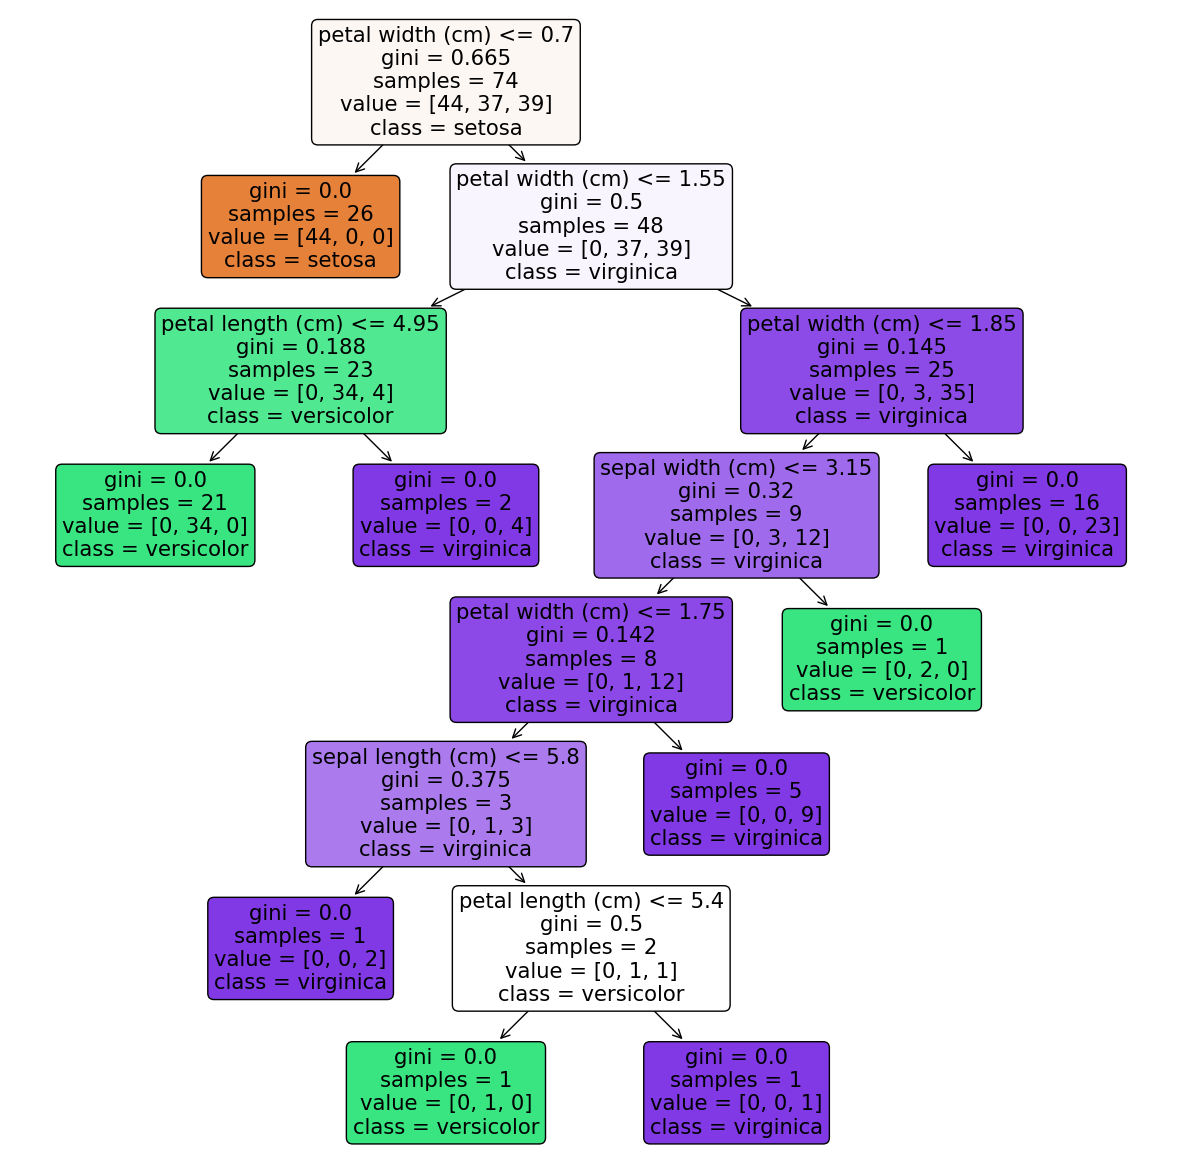

In [7]:
# Plot a specific tree from the Random Forest
tree = model.estimators_[0]
plt.figure(figsize=(15,15))
plot_tree(tree, 
          feature_names=data.feature_names, 
          class_names=data.target_names, 
          filled=True, 
          rounded=True)
plt.show()

**2. Boosting**

* Boosting is an ensemble learning technique that combines the predictions of several base estimators (weak learners) to improve the overall performance of a model. 
* Unlike bagging methods like Random Forest, which build multiple independent models, boosting methods build models sequentially, each trying to correct the errors made by the previous ones.

**Working Mechanism**
* Boosting trains a learner on some initial dataset, d. The resultant learner is typically weak, misclassifying many samples in the dataset. 
* Much like bagging, boosting then samples instances from the initial dataset to create a new dataset (d2). Unlike bagging, however, boosting prioritizes misclassified data instances from the first model or learner. 
* A new learner is trained on this new dataset d2. Then a third dataset (d3) is then compiled from d1 and d2, prioritizes the second learner’s misclassified samples and instances in which d1 and d2 disagree. 
* The process repeats n times to produce n learners. 
* Boosting then combines and weights the all the learners together to produce final predictions.


<center>
    <img src="../assets/boosting.png" width=600/>
</center>


**Types of Boosting Algorithms**
* Boosting algorithms largely differ in how they prioritize erroneously predicted data instances when creating a new dataset. 

* Two of the most prominent boosting methods may illustrate this:

1. Adaptive boosting (AdaBoost)
    * It weights model errors. That is, when creating a new iteration of a dataset for training the next learner, AdaBoost adds weights to the previous learner’s misclassified samples, causing the next learner to prioritize those misclassified samples.

    *  Hard-to-classify instances are given more weight in subsequent iterations.

    * Steps:

        * Assign equal weights to all training instances.
        * Train a weak learner (e.g., a decision stump) and calculate its error.
        * Increase the weights of misclassified instances.
        * Train the next weak learner on the updated weights.
        * Combine the weak learners using weighted majority voting.


<center>
    <img src="../assets/adaboost.png" width=400/>
</center>

2. Gradient Boosting
    * It uses residual errors when training new learners. Rather than weight misclassified samples, gradient boosting uses residual errors from a previous model to set target predictions for the next model. In this way, it attempts to close the gap of error left by one model.

    * Builds models sequentially, each new model correcting the residuals of the previous one. 

    * Steps:

        * Initialize with a base model (e.g., mean for regression).
        * Compute residuals (errors) from the base model.
        * Train a new model to predict these residuals.
        * Update the base model by adding the new model's predictions, scaled by a learning rate.
        * Repeat until a predefined number of iterations is reached or the error is sufficiently small.

<center>
    <img src="../assets/gradient_boosting.png" width=500/>
</center>

**Adaboost Implementation**

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost model
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


**Gradient Boosting Implementation**

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

model.fit(X_train, y_train)

Accuracy: 1.0


GradientBoostingClassifier(random_state=42)